# Message Spam Filter Using Naive Bayes Theorem

This project is basically one of the application of Naive Bayes Theorem. In this project, we are going to build a message spam filter which will ultimately tell whether a message is spam, not spam or it needs human to verify the type. Through out this project, I will also show the basic rules of Naive Bayes Theorem to understand the project. I got this project idea form Dataquest, an online platform to learn machine learning. 

#### Overview of the algorithm
We will make two dataset from the original dataset. One is for training and other is for the test. We will apply the algorithm to the training dataset and determine the probability of actual Spam and Non Spam message. Then depending on this training set outcome, we will apply the same algorithm to the test set to check if our process worked or not. **Our initial target is to get 85% accuracy.**

##### Data
we got the data from this [website](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection) and data collection process is also describe in this [page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/#composition)

In [1]:
# Importing librqary
import numpy as np
import pandas as pd

In [2]:
# loading dataset
df = pd.read_csv('SMSSpamCollection', header= None, names= ['Label', 'SMS'], sep= '\t')
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


-  The SMS column is truncated. We can increase the width to get a clear view of the sms.

In [3]:
pd.set_option('max_colwidth', 5000)

df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


-  Acoording to the dataset details, this ham means Non Spam message. We also see that, there is so many mixed letter, upper case, lower case, many unnecessary space and more. We will clean the dataset step by step.

In [4]:
df.shape

(5572, 2)

In [5]:
df.Label.value_counts(normalize= True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

-  So around 86% of data is ham/non spam and 13% is spam. When we do the training and test set, we need to make sure that the data distribution proportion is same as the original dataset.

**Now we will split the dataset into two: training and test dataset. To get the data as many as possible, we will take 80% of the data as trainig set and rest as a test set.**

In [7]:
# Randomize the dataset
shuffled_set = df.sample(frac= 1, random_state= 1)

# Training and test dataset
training_set = shuffled_set[ : round(len(shuffled_set)*.8)]      # 1st 80%
test_set = shuffled_set[round(len(shuffled_set)*.8) : ]          # last 20%

# training and test dataset shape
print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


In [8]:
# to set the datset index as 0,1,2,3........
training_set.reset_index(drop= True, inplace= True)  

test_set.reset_index(drop= True, inplace = True)    

In [9]:
training_set.head()

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired
3,ham,Havent.
4,ham,I forgot 2 ask ü all smth.. There's a card on da present lei... How? Ü all want 2 write smth or sign on it?


In [10]:
test_set.head()

,Label,SMS
0,ham,Later i guess. I needa do mcat study too.
1,ham,But i haf enuff space got like 4 mb...
2,spam,Had your mobile 10 mths? Update to latest Orange camera/video phones for FREE. Save £s with Free texts/weekend calls. Text YES for a callback orno to opt out
3,ham,All sounds good. Fingers . Makes it difficult to type
4,ham,"All done, all handed in. Don't know if mega shop in asda counts as celebration but thats what i'm doing!"


-   Now, we need to check the proportion of the data distribution.

In [11]:
training_set.Label.value_counts(normalize= True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [13]:
test_set.Label.value_counts(normalize= True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

-   We see that, for both set the distribution is not same but similar to the original dataset, which should work fine.

# Cleaning the training dataset

-   What we would do first is convert each text to lower case and then remove all the character except a-z A-z and 1-9

In [14]:
def cleaned_sms(x):
    import re
    x = x.lower()                              # to lower case
    x = re.sub('[^\w\s]', '', x)               # remove character except a-z, A-z,1-9 and white space.
    return x

# adding this cleaned column
training_set['Cleaned_sms'] = training_set.SMS.apply(cleaned_sms)

C:\Users\rakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
training_set.head()

,Label,SMS,Cleaned_sms
0,ham,"Yep, by the pretty sculpture",yep by the pretty sculpture
1,ham,"Yes, princess. Are you going to make me moan?",yes princess are you going to make me moan
2,ham,Welp apparently he retired,welp apparently he retired
3,ham,Havent.,havent
4,ham,I forgot 2 ask ü all smth.. There's a card on da present lei... How? Ü all want 2 write smth or sign on it?,i forgot 2 ask ü all smth theres a card on da present lei how ü all want 2 write smth or sign on it


**So, now our main goal is to determine two probabilities and then compare.  <br>
&emsp; &emsp; &emsp;(i) Probability of spam given the input message.
&emsp;&emsp;&emsp; (ii) Probability of a ham (not spam) given the input message. <br>
Since a message is made up of words, we basically need to determine these both probability for each word. We are going to follow the below rules.** <br><br>

-  **if each word is w1, w2, w3.... then**
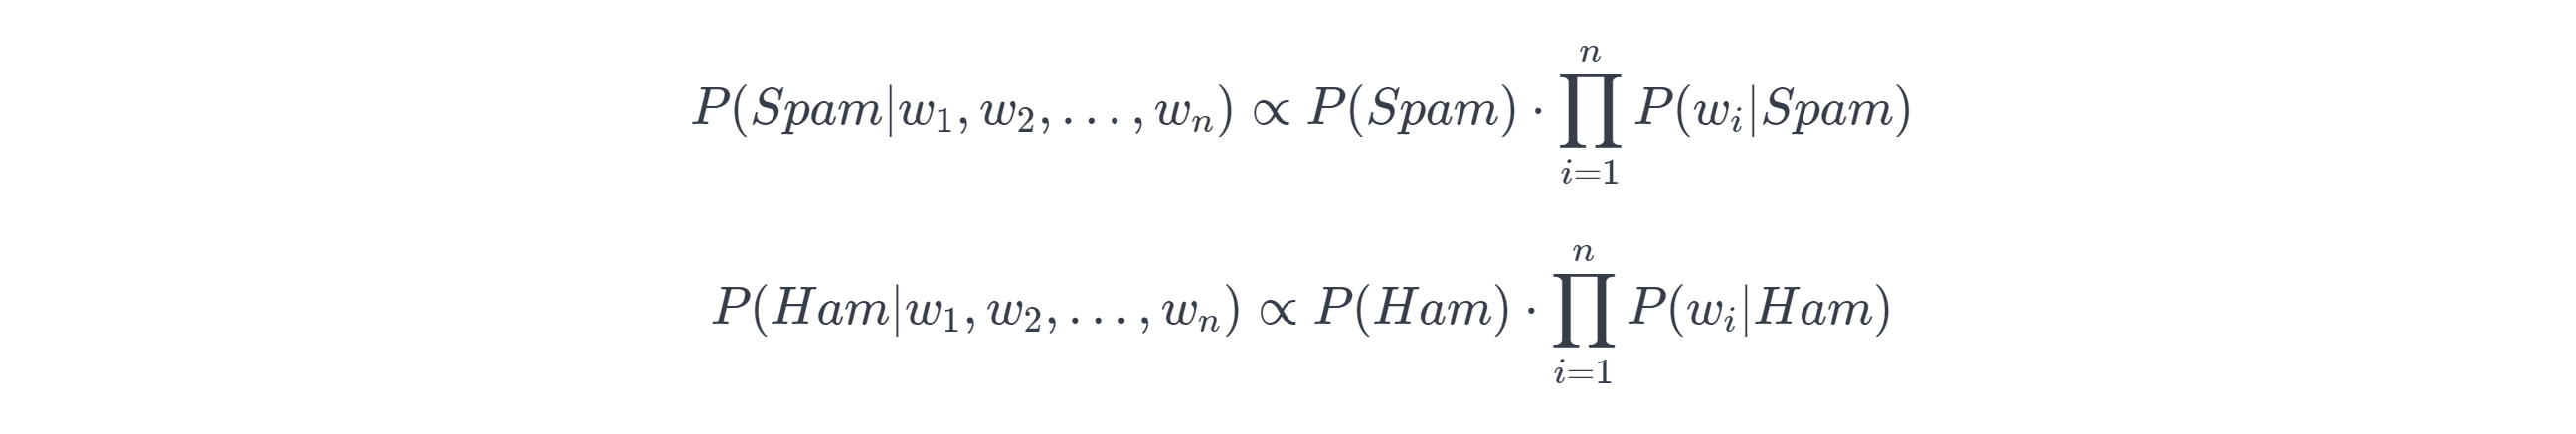

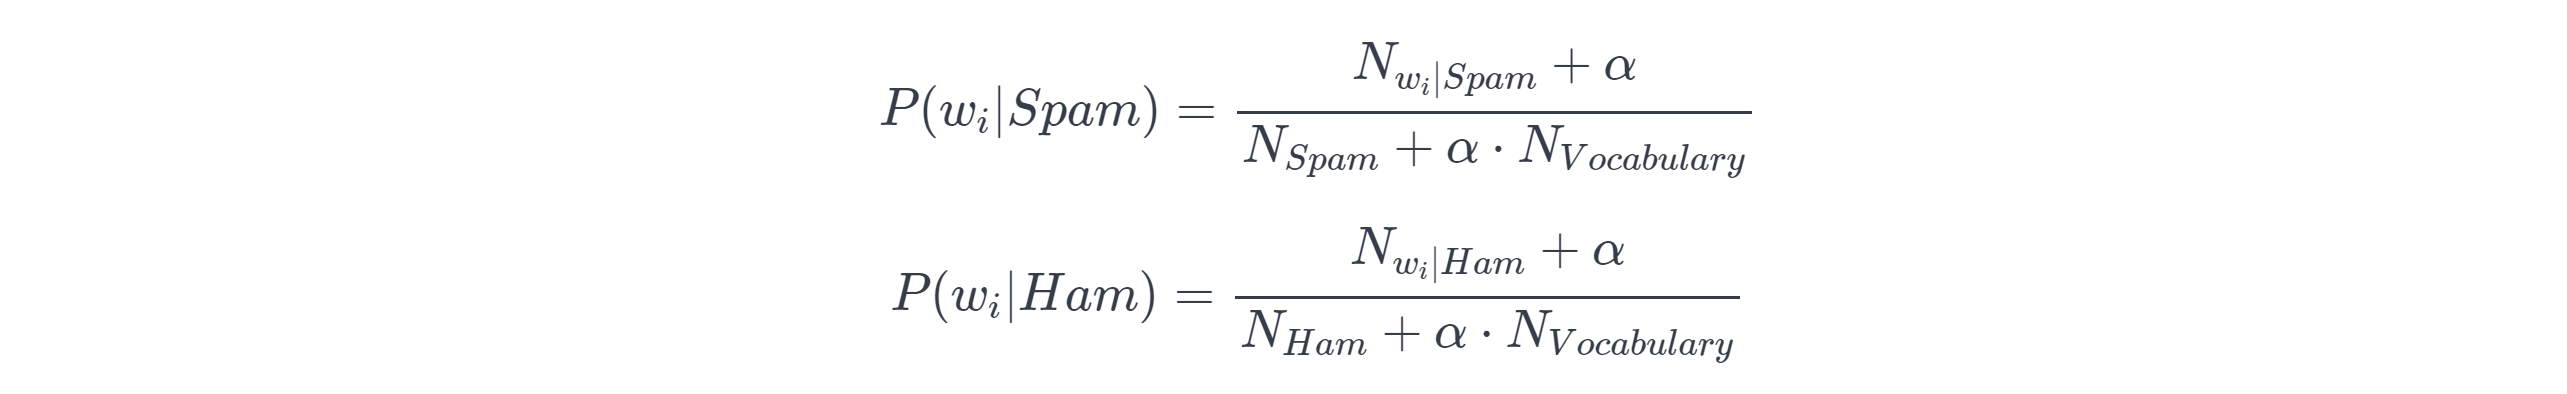
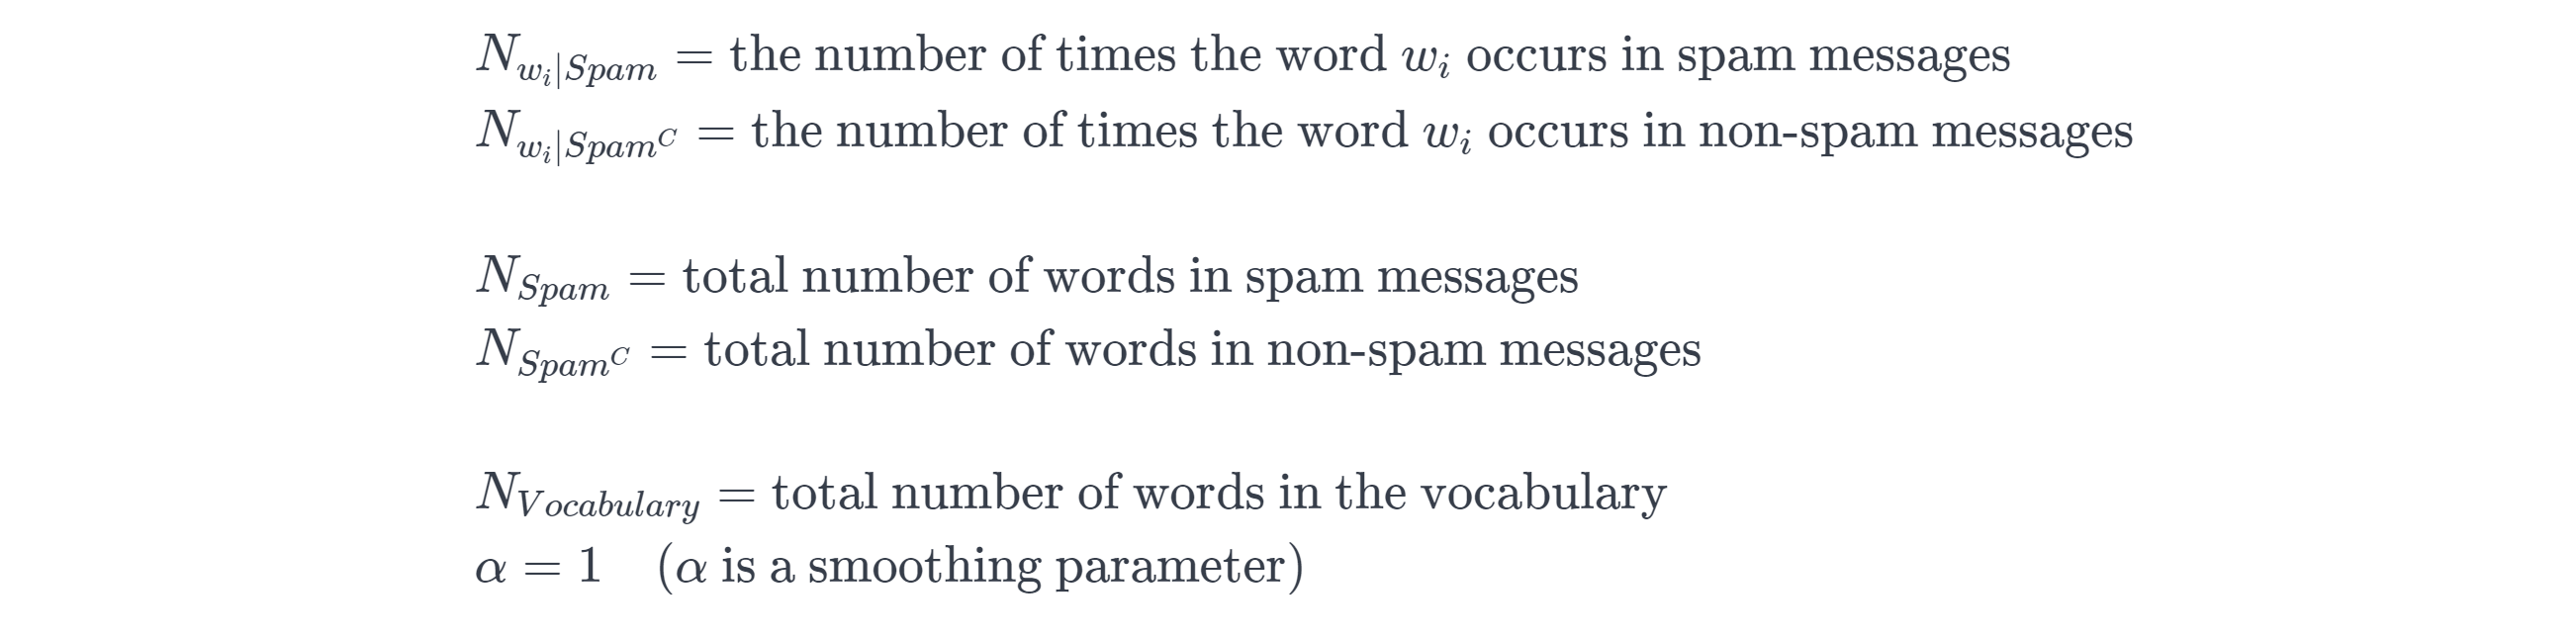

**As per the rules, we need to determine how many time each word occured. We need a format like the below picture.**
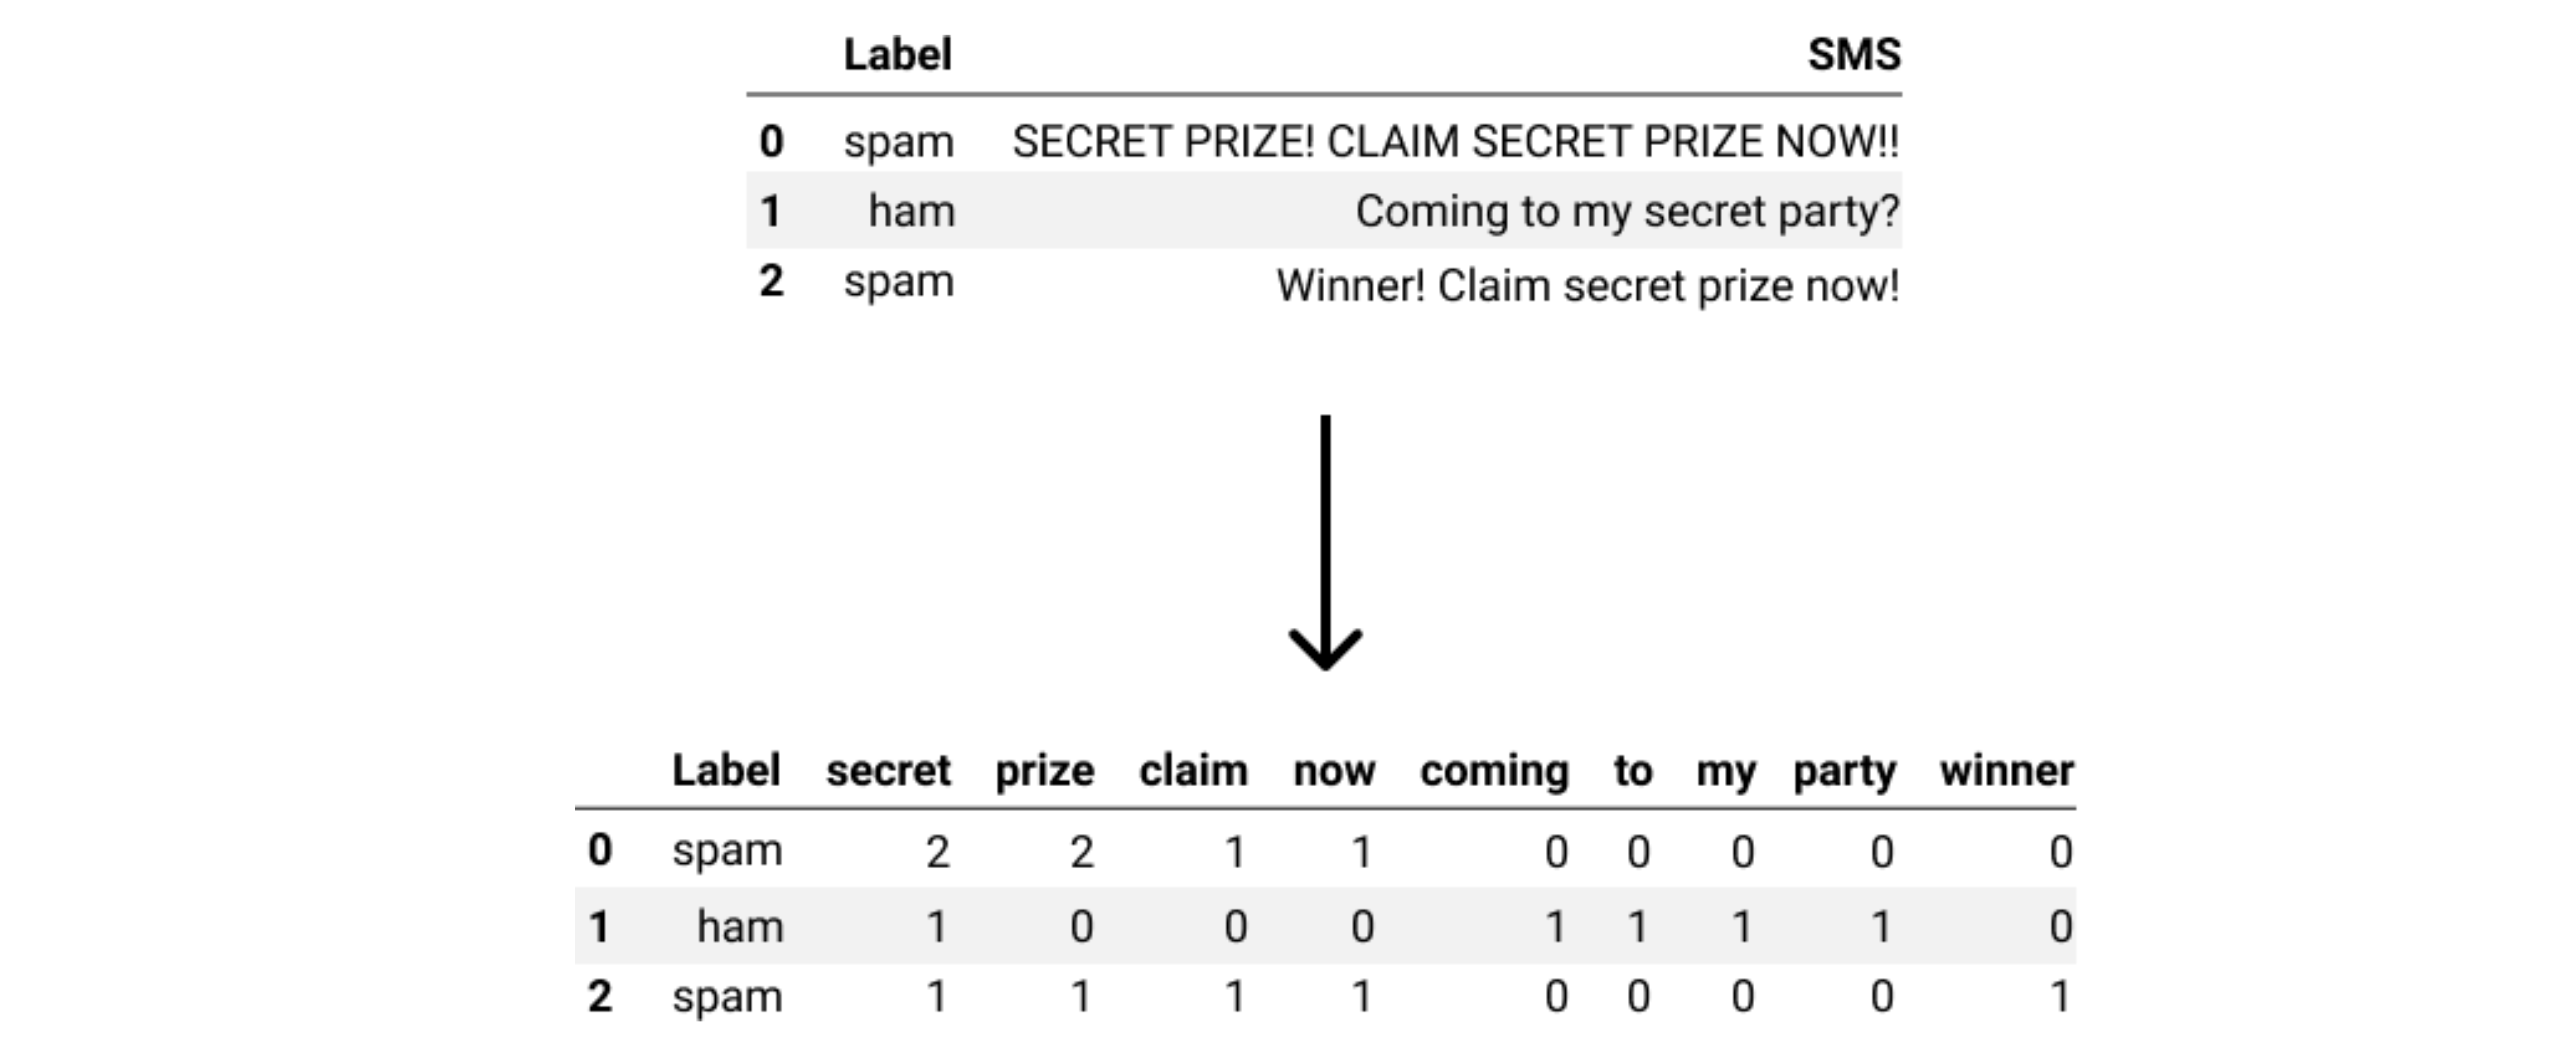

In [17]:
# Determine a set of all unique words.
all_words = []    

for row in training_set.Cleaned_sms:
    for word in row.split():
        all_words.append(word)
    
unique_words = set(all_words)

In [18]:
len(all_words)       # Number of all vocabularies

68613

In [20]:
len(unique_words)    # Number of all unique vocabularies

8448

In [21]:
# Priting the unique words how it looks.
print(unique_words)

{'novelty', 'future', 'imposter', 'sized', 'jazz', 'sending', 'sen', 'laid', 'amnow', 'ucall', 'gt', 'aint', 'swhrt', 'reformat', 'simpler', 'activate', 'period', 'nething', 'nowsavamobmember', 'walks', 'philosophy', '180', 'callin', 'reverse', 'orig', 'vijay', '731', 'spelling', '74355', 'flying', 'from', 'wrong', 'ge', 'scotch', 'brand', 'fell', 'bathing', 'uncle', 'zindgi', 'smsshsexnetun', 'ldnw15h', 'killing', '21st', 'minecraft', '150pmeg', 'recpt', 'afterwards', '09066362206', 'nor', '09061743386', 'opening', 'brothas', 'hill', 'able', 'mitsake', 'adore', 'mobilesdirect', 'smell', 'ts', 'smokin', 'haul', 'page', '6zf', 'low', '69988', 'box39822', 'generally', 'parantella', 'petrol', 'seconds', 'piece', 'yorge', 'cloud', 'refund', 'vary', 'whileamp', 'something', '6days', 'ibn', 'size', 'smith', 'soso', 'sections', 'icky', 'saves', 'progress', 'familymay', 'wrc', 'familiar', 'asian', 'sms08718727870', 'dieting', 'kath', 'enters', 'sayy', 'kb', 'howard', 'html', 'deal', 'calculati

**Now we will count each word and create a data frame to concat with the training set.**

In [22]:
# Creating a dictionary with the same length as training set.
unique_words_dic = {item : [0]*len(training_set) for item in unique_words}

# Counting the number of wrods for each row.
for index, sentence in enumerate(training_set.Cleaned_sms):
    sentence = sentence.split()
    for word in sentence:
        unique_words_dic[word][index] += 1  

In [23]:
training_set_words = pd.DataFrame(unique_words_dic)

In [24]:
training_set_words.head()

,novelty,future,imposter,sized,jazz,sending,sen,laid,amnow,ucall,...,yor,allalo,aom,free,wrk,mayb,authorise,stunning,meds,09058094599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Now, creating the final set.
training_set_final = pd.concat([training_set, training_set_words], axis= 1)

In [26]:
training_set_final.head(2)

,Label,SMS,Cleaned_sms,novelty,future,imposter,sized,jazz,sending,sen,...,yor,allalo,aom,free,wrk,mayb,authorise,stunning,meds,09058094599
0,ham,"Yep, by the pretty sculpture",yep by the pretty sculpture,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"Yes, princess. Are you going to make me moan?",yes princess are you going to make me moan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**In the below equation, there are some terms which we need for every value. So we can determine these first and seperately**
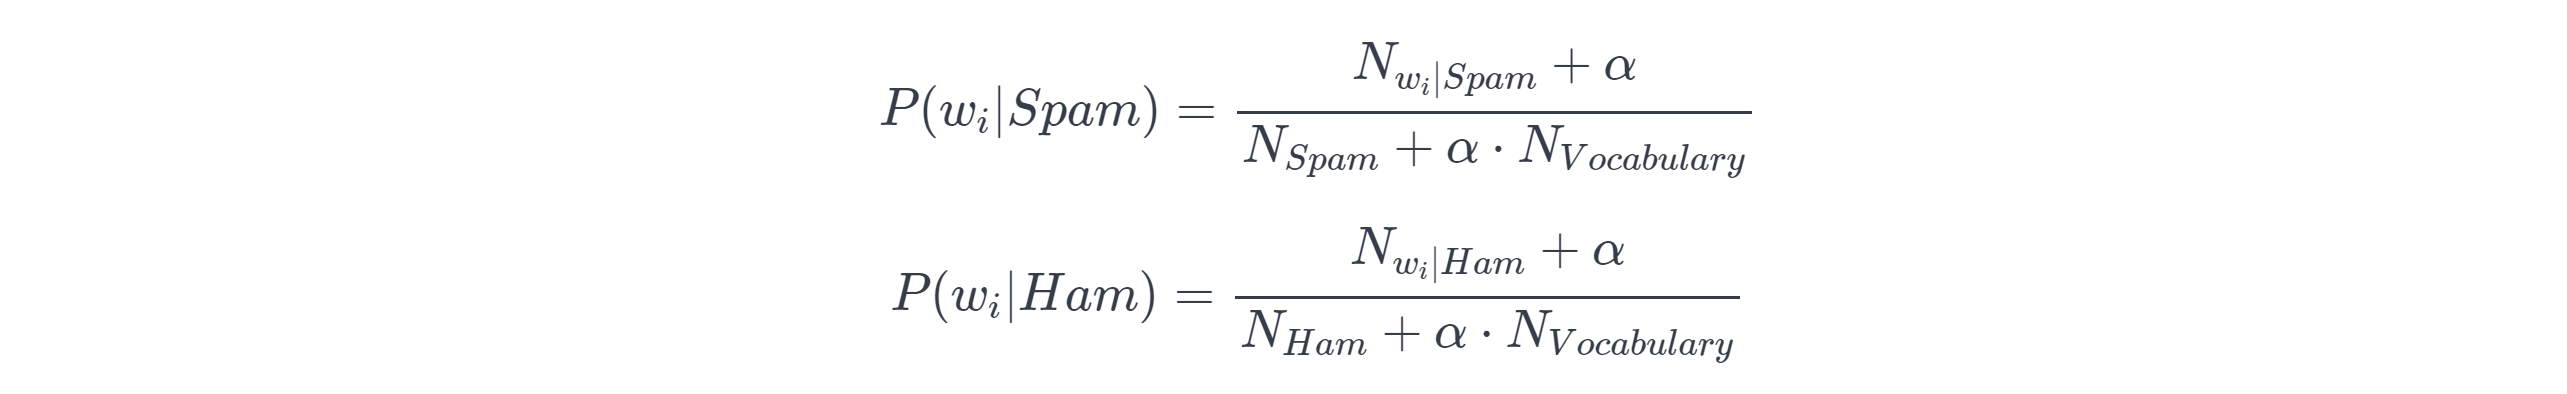

In [27]:
# Training set with ham message only.
training_set_ham = training_set_final[training_set_final.Label == 'ham']

# Training set with spam message only.
training_set_spam = training_set_final[training_set_final.Label == 'spam']

In [28]:
# probability of spam 'p(spam)' and probabilty of ham 'p(ham)'

p_spam = len(training_set_spam) / len(training_set_final)
p_ham = len(training_set_ham) / len(training_set_final)

print('p_ham: ', p_ham)
print('p_spam: ', p_spam)

p_ham:  0.8654104979811574
p_spam:  0.13458950201884254


In [29]:
# number of total words in spam (Nspam) and in ham (Nham)
# In spam
length = 0
for row in training_set_spam.Cleaned_sms:
    split = row.split()         # splitting the text by space and which contains all words
    length = length + len(split)
total_words = length

n_spam = total_words

# In ham
length = 0
for row in training_set_ham.Cleaned_sms:
    split = row.split()         # splitting the text by space and which contains all words
    length = length + len(split)
total_words = length

n_ham = total_words

print('n_spam (number of total words in spam): ', n_spam)
print('n_ham (number of total words in ham): ', n_ham)

n_spam (number of total words in spam):  14081
n_ham (number of total words in ham):  54532


In [30]:
# total number of vocabulary in the whole training set

n_vocabulary = len(unique_words)
print('n_vocabulary (number of total words in dataset): ', n_vocabulary)

n_vocabulary (number of total words in dataset):  8448


-  **So what we got so far is**

In [34]:
print('alpha: ',alpha, end= '\t\t\t')
print('n_vocabulary: ', n_vocabulary)
print('p_ham: ', p_ham, end= '\t')
print('p_spam: ', p_spam)
print('n_ham: ', n_ham, end= '\t\t\t')
print('n_spam: ', n_spam)

alpha:  1			n_vocabulary:  8448
p_ham:  0.8654104979811574	p_spam:  0.13458950201884254
n_ham:  54532			n_spam:  14081


-  **Now we will determine the probability of a word given that the sms is spam 'P(Word|ham)', and probability of a word given that the sms is ham 'P(Word|spam)'**

In [36]:
# Creating an empty dictionary for each word with value 0.
prob_word_given_ham = {}
prob_word_given_spam = {}

for word in unique_words:
    prob_word_given_ham[word] = 0
    prob_word_given_spam[word] = 0

In [39]:
# Function to determine P(Word|ham)
def prob_word_ham(word):
    n_w_ham = training_set_ham[word].sum()
    numerator = n_w_ham + alpha
    denominator = n_ham + (alpha * n_vocabulary)
    
    answer = numerator / denominator
    return answer

# Function to determine P(Word|spam)
def prob_word_spam(word):
    n_w_spam = training_set_spam[word].sum()
    numerator = n_w_spam + alpha
    denominator = n_spam + (alpha * n_vocabulary)
    
    answer = numerator / denominator
    return answer

# Applying the function and assigning the value into the dictionary
# For ham
for item in prob_word_given_ham:
    prob_word_given_ham[item] = prob_word_ham(item)

# For spam.
for item in prob_word_given_spam:
    prob_word_given_spam[item] = prob_word_spam(item)

In [42]:
# Example
prob_word_given_ham['slap']

6.351222610352493e-05

In [44]:
# Example
prob_word_given_spam['slap']

4.4387234231435036e-05

### Now, it's time to write a function, which will take a message as a input. The function will then apply what we did so far and eventually, we will get the two probability.  We will consider the below condition for checking spam and ham.

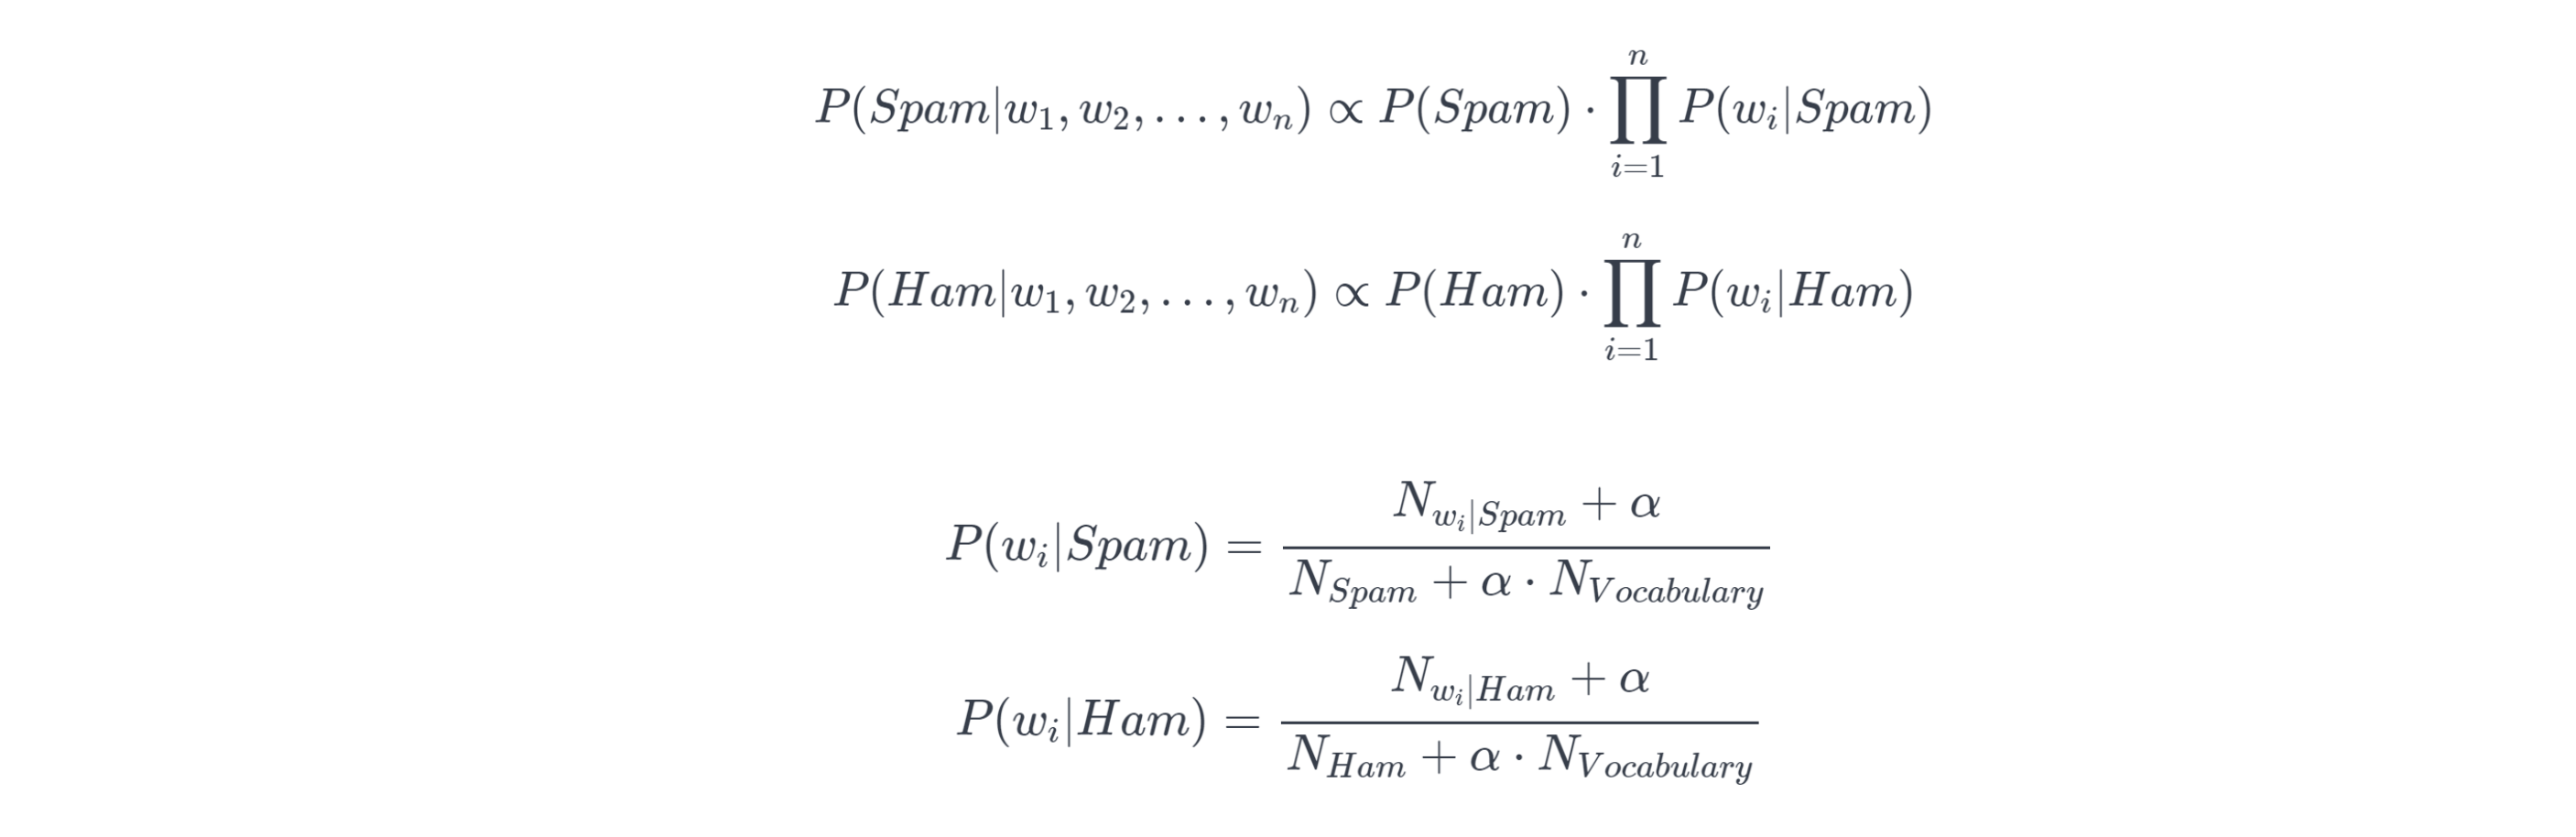
<b>
&emsp; (i) If P(Spam|sms) > P(Ham|sms), it is a SPAM.  <br>
&emsp; (ii) If P(Spam|sms) < P(Ham|sms), it is HAM/ NOT SPAM. <br>
      &emsp; (iii) If P(Spam|sms) = P(Ham|sms), it needs human to specify the type.
    
</b>

In [61]:
import re
def classify(text):
    
    # Cleaning the text
    text = text.lower()
    text = re.sub('[^\w\s]', ' ', text)
    text = text.split()
    
    # Assigning the initial value
    p_spam_given_the_sms = p_spam
    p_ham_given_the_sms = p_ham
    
    # calculating the probability for each word.
    for word in text:
        if word in prob_word_given_ham:
            p_ham_given_the_sms *= prob_word_given_ham[word]
        if word in prob_word_given_spam:
            p_spam_given_the_sms *= prob_word_given_spam[word]
            
    print('p(ham|sms) = ', p_ham_given_the_sms, end='\t\t')
    print('p(spam|sms) = ', p_spam_given_the_sms)
    print('\n')
    
    # Condition
    if p_ham_given_the_sms > p_spam_given_the_sms:
        print('SMS/Message is NOT SPAM')
    elif p_ham_given_the_sms < p_spam_given_the_sms: 
        print('SMS/Message is SPAM')
    else:
        print('Need human help to classify.')

In [62]:
# Testing a spam message
classify('WINNER!! This is the secret code to unlock the money: C3421.')

p(ham|sms) =  2.260845448818521e-27		p(spam|sms) =  1.475065887155989e-25


SMS/Message is SPAM


In [63]:
classify("Hello, this is Rakib. Have you got any secret message about money from CEO today?")

p(ham|sms) =  1.2451440856823154e-36		p(spam|sms) =  4.05491006544363e-40


SMS/Message is NOT SPAM


-  **So far, we can tell that the filter is working fine. Now, we will apply this filter on test set and check the accuracy.**

### Since we are going to apply on the test set, we will change the print function to return and make a seperate to store our result. 

In [77]:
import re
def classify_on_test(text):
    
    # Cleaning the text
    text = text.lower()
    text = re.sub('[^\w\s]', ' ', text)
    text = text.split()
    
    # Assigning the initial value
    p_spam_given_the_sms = p_spam
    p_ham_given_the_sms = p_ham
    
    # calculating the probability for each word.
    for word in text:
        if word in prob_word_given_ham:
            p_ham_given_the_sms *= prob_word_given_ham[word]
        if word in prob_word_given_spam:
            p_spam_given_the_sms *= prob_word_given_spam[word]
        
    # Condition
    if p_ham_given_the_sms > p_spam_given_the_sms:
        return('ham')
    elif p_ham_given_the_sms < p_spam_given_the_sms: 
        return('spam')
    else:
        return('Need humans.')

In [78]:
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Orange camera/video phones for FREE. Save £s with Free texts/weekend calls. Text YES for a callback orno to opt out,spam
3,ham,All sounds good. Fingers . Makes it difficult to type,ham
4,ham,"All done, all handed in. Don't know if mega shop in asda counts as celebration but thats what i'm doing!",ham


In [79]:
# Testing on the test set and assigning a column with the return value
test_set['predicted'] = test_set['SMS'].apply(classify_on_test)

C:\Users\rakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Orange camera/video phones for FREE. Save £s with Free texts/weekend calls. Text YES for a callback orno to opt out,spam
3,ham,All sounds good. Fingers . Makes it difficult to type,ham
4,ham,"All done, all handed in. Don't know if mega shop in asda counts as celebration but thats what i'm doing!",ham


In [103]:
test_set.predicted.value_counts()

ham             970
spam            143
Need humans.      1
Name: predicted, dtype: int64

In [73]:
test_set.Label.value_counts()

ham     967
spam    147
Name: Label, dtype: int64

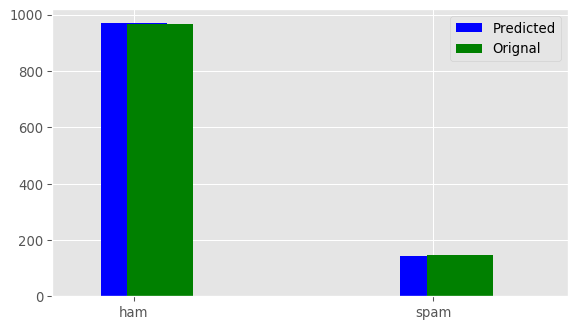

In [102]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(7,4), dpi= 95)


test_set.predicted.value_counts().plot.bar(color= 'blue', width= .22, label= 'Predicted', rot= 0)
test_set.Label.value_counts().plot.bar(color= 'green', width= .22, position= .1, label= 'Orignal', rot= 0)

plt.legend()
plt.show()

- **We see that the correct prediction number is almost same as the orgincal data. Let's check the accuracy to get the exact rate.**

In [104]:
# Accuracy check
correct = 0
incorrect = 0
for label, predicted in zip(test_set.Label, test_set.predicted):
    if label == predicted:
        correct += 1
    else:
        incorrect += 1

accuracy = correct / (correct + incorrect)
print(accuracy)

0.9793536804308797


# We have come to the end of this project. Since the accuracy rate is around 98% which is way high than our set score 85%, we can say that the spam filter algorithm is working fine. 